#Plotting and analyzing gatekeeper mutants for Src and Abl using bosutinib isomer data

We are plotting fluorescence assay spectra collected according to this lab-protocols protocol. Further details of the specific experiment can be found in the fluorescence assay lab notebook on December 15-18, 2015. This notebook is a deeper analysis of data from the 'Spectra-Assay-Analysis' notebook.

This notebook is meant to make a high quality figure showing the shift in bosutinib isomer affinity as a result of the gatekeeper mutant.

In [1]:
import numpy as np
from lxml import etree
import pandas as pd
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

sns.set(style='white')
sns.set_context('talk')
%matplotlib inline

In [2]:
file_set = {'Src': glob("2015-12-15/*.xml"),
        'SrcGK': glob("2015-12-16/*.xml"),
        'AblGK': glob("2015-12-17/*.xml"),
        'Abl': glob("2015-12-18/*.xml")}

In [3]:
#Define ligands and ligand concentration
ligands = ['Bosutinib','Bosutinib Isomer','Erlotinib','Gefitinib']
ligand_conc = np.array([20.0e-6,9.15e-6,4.18e-6,1.91e-6,0.875e-6,0.4e-6,0.183e-6,0.0837e-6,0.0383e-6,0.0175e-6,0.008e-6,0.0001e-6], np.float64) # ligand concentration, M

In [4]:
ligand_conc

array([  2.00000000e-05,   9.15000000e-06,   4.18000000e-06,
         1.91000000e-06,   8.75000000e-07,   4.00000000e-07,
         1.83000000e-07,   8.37000000e-08,   3.83000000e-08,
         1.75000000e-08,   8.00000000e-09,   1.00000000e-10])

In [5]:
#This function allows us to import xml format data files and convert them to a pandas dataframe
def xml2df(file):

    root = etree.parse(file)

    data = []

    reads = root.xpath("/*/Section[1]/*/Well")

    wellIDs = [read.attrib['Pos'] for read in reads]

    data = [(s.text, float(s.attrib['WL']), r.attrib['Pos'])
        for r in reads
        for s in r]

    dataframe = pd.DataFrame(data, columns=['fluorescence','wavelength (nm)','Well'])
            
    ### dataframe_rep replaces 'OVER' (when fluorescence signal maxes out) with '3289277', an arbitrarily high number

    dataframe_rep = dataframe.replace({'OVER':'3289277'})

    dataframe_rep[['fluorescence']] = dataframe_rep[['fluorescence']].astype('float')
            
    dataframe_pivot = pd.pivot_table(dataframe_rep, index = 'wavelength (nm)', columns = ['Well'])
    
    #Rearrange columns so they're in the right order
    cols =  dataframe_pivot['fluorescence'].columns.tolist()
    cols = [cols[0]] + cols[4:12] + cols[1:4] + [cols[13]] + cols[17:25] + cols[14:17]
    dataframe_reindex =  dataframe_pivot.reindex_axis(cols,level='Well',axis=1)
    
    return dataframe_reindex

In [6]:
SrcGK_BSI = xml2df(file_set['SrcGK'][1])

In [7]:
SrcGK_BSI.head()

fluorescence                                               \
Well                      C1       C2       C3       C4       C5       C6   
wavelength (nm)                                                             
280                  3289277  3289277  3289277  3289277  3289277  3289277   
285                  3289277  3289277  3289277  3289277  3289277  3289277   
290                  3289277  3289277  3289277  3289277  3289277  3289277   
295                  3289277  3289277  3289277  3289277  3289277  3289277   
300                  3289277  3289277  3289277  3289277  3289277  3289277   

                                                      ...              \
Well                  C7       C8       C9      C10   ...          D3   
wavelength (nm)                                       ...               
280              3289277  3289277  3289277  3289277   ...     3289277   
285              3289277  3289277  3289277  3289277   ...     3289277   
290              3289277  3289277  3289277  3289277   ...     3289277   
295              3289277  3289277  3289277  3289277   ...     3289277   
300              3289277  3289277  3289277  3289277   ...     3289277   

                                                                       \
Well                  D4       D5       D6       D7       D8       D9   
wavelength (nm)                                                         
280              3289277  3289277  3289277  3289277  3289277  3289277   
285              3289277  3289277  3289277  3289277  3289277  3289277   
290              3289277  3289277  3289277  3289277  3289277  3289277   
295              3289277  3289277  3289277  3289277  3289277  3289277   
300              3289277  3289277  3289277  3289277  3289277  3289277   

                                            
Well                 D11      D12       D2  
wavelength (nm)                             
280              3289277  3289277  3289277  
285              3289277  3289277  3289277  
290              3289277  3289277  3289277  
295              3289277  3289277  3289277  
300              3289277  3289277  3289277  

[5 rows x 23 columns]

In [8]:
SrcGK_BSI.head()

fluorescence                                               \
Well                      C1       C2       C3       C4       C5       C6   
wavelength (nm)                                                             
280                  3289277  3289277  3289277  3289277  3289277  3289277   
285                  3289277  3289277  3289277  3289277  3289277  3289277   
290                  3289277  3289277  3289277  3289277  3289277  3289277   
295                  3289277  3289277  3289277  3289277  3289277  3289277   
300                  3289277  3289277  3289277  3289277  3289277  3289277   

                                                      ...              \
Well                  C7       C8       C9      C10   ...          D3   
wavelength (nm)                                       ...               
280              3289277  3289277  3289277  3289277   ...     3289277   
285              3289277  3289277  3289277  3289277   ...     3289277   
290              3289277  3289277  3289277  3289277   ...     3289277   
295              3289277  3289277  3289277  3289277   ...     3289277   
300              3289277  3289277  3289277  3289277   ...     3289277   

                                                                       \
Well                  D4       D5       D6       D7       D8       D9   
wavelength (nm)                                                         
280              3289277  3289277  3289277  3289277  3289277  3289277   
285              3289277  3289277  3289277  3289277  3289277  3289277   
290              3289277  3289277  3289277  3289277  3289277  3289277   
295              3289277  3289277  3289277  3289277  3289277  3289277   
300              3289277  3289277  3289277  3289277  3289277  3289277   

                                            
Well                 D11      D12       D2  
wavelength (nm)                             
280              3289277  3289277  3289277  
285              3289277  3289277  3289277  
290              3289277  3289277  3289277  
295              3289277  3289277  3289277  
300              3289277  3289277  3289277  

[5 rows x 23 columns]

In [9]:
SrcGK_BSI_480 = SrcGK_BSI.loc[480][:12]

In [10]:
SrcGK_BSI_480.values

array([ 65202.,  64861.,  55253.,  37296.,  19109.,   9659.,   5966.,
         6148.,   2405.,   2503.,   2019.,   1768.])

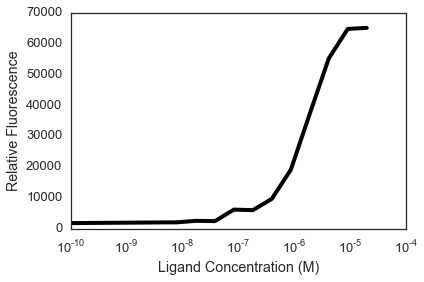

In [11]:
plt.semilogx(ligand_conc,SrcGK_BSI_480.values,linewidth=4,color='k')
plt.xlabel('Ligand Concentration (M)')
plt.ylabel('Relative Fluorescence')
plt.tight_layout();
plt.savefig('binding.png',dpi=1000)

In [12]:
Src_BSI = xml2df(file_set['Src'][1])
Src_BSI_480 = Src_BSI.loc[480][:12]

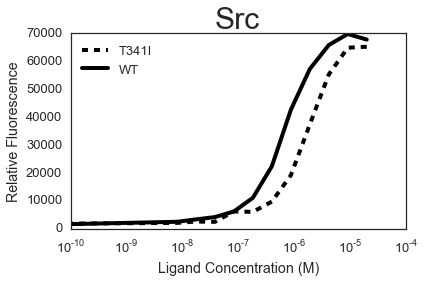

In [18]:
plt.semilogx(ligand_conc,SrcGK_BSI_480.values,linewidth=4,color='k',linestyle='--',label='T341I')
plt.semilogx(ligand_conc,Src_BSI_480.values,linewidth=4,color='k',label='WT')
plt.legend(loc=0)
plt.title('Src',fontsize=30)
plt.xlabel('Ligand Concentration (M)')
plt.ylabel('Relative Fluorescence')
plt.tight_layout();
plt.savefig('Src_GK.eps',type='eps',dpi=1000)

In [15]:
AblGK_BSI = xml2df(file_set['AblGK'][1])
AblGK_BSI_480 = AblGK_BSI.loc[480][:12]
Abl_BSI = xml2df(file_set['Abl'][1])
Abl_BSI_480 = Abl_BSI.loc[480][:12]

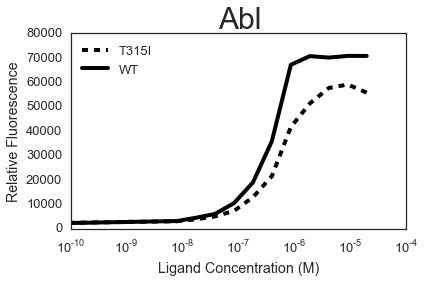

In [19]:
plt.semilogx(ligand_conc,AblGK_BSI_480.values,linewidth=4,color='k',linestyle='--',label='T315I')
plt.semilogx(ligand_conc,Abl_BSI_480.values,linewidth=4,color='k',label='WT')
plt.legend(loc=2)
plt.title('Abl',fontsize=30)
plt.xlabel('Ligand Concentration (M)')
plt.ylabel('Relative Fluorescence')
plt.tight_layout();
plt.savefig('Abl_GK.eps',type='eps',dpi=1000)

In [ ]:
plt.semilogx(ligand_conc,Abl_BSI_480.values,linewidth=4,color='k')
plt.xlabel('Ligand Concentration (M)')
plt.ylabel('Relative Fluorescence')
plt.tight_layout();
plt.savefig('binding.png',dpi=1000)

In [34]:
# Can we make a function that allows us to bring this data in in a better format to deal with for pymc?

In [18]:
#this function allows us to plot the saturation curve at a single wavelength of the spectra
def plot_spectra2singlet(file_set,ligands,wavelength):
    
    fig, axes = plt.subplots(nrows=len(file_set), ncols=4, figsize=(22,22))
    
    proteins = file_set.keys()
    
    for j,protein in enumerate(file_set):
    
        files = file_set[protein]
        print file_set[protein]
    
        for i in range(len(files)):
        
            #Extract data from the xml file and make a dataframe
            df = xml2df(files[i])

            hardcode = wavelength #nm
     
            # This plots things.
            df.loc[hardcode][0:11].plot(ax = axes[j,i], xticks=[],linewidth=4)
            df.loc[hardcode][11:23].plot(ax = axes[j,i], xticks=[],linewidth=4,title ='%s - %s' %(proteins[j], ligands[i]))
        plt.text(4,15000,'wavelength %s nm'%hardcode,fontsize=20)
        
    plt.savefig('Spectra_assay_singlets.png',dpi=1000)

['2015-12-17/AblD382N-T334I_Bos_20151217_bw2020_gain120_120553.xml', '2015-12-17/AblD382N-T334I_BosI_20151217_bw2020_gain120123031.xml', '2015-12-17/AblD382N-T334I_Erl_20151217_bw2020_gain120_125515.xml', '2015-12-17/AblD382N-T334I_Gef_20151217_bw2020_gain120_132641.xml']
['2015-12-15/Src_Bos_20151215_bw2020_gain120_161211.xml', '2015-12-15/Src_BosI_20151215_bw2020_gain120_163633.xml', '2015-12-15/Src_Erl_20151215_bw2020_gain120_170056.xml', '2015-12-15/Src_Gef_20151215_bw2020_gain120_172518.xml']
['2015-12-18/AblD382N_Bos_20151218_bw2020_gain120_ 14-41-14_plate_1.xml', '2015-12-18/AblD382N_BosI_20151218_bw2020_gain12014-55-55_plate_1.xml', '2015-12-18/AblD382N_Erl_20151218_bw2020_gain120 15-11-11_plate_1.xml', '2015-12-18/AblD382N_Gef_20151218_bw2020_gain120 15-25-58_plate_1.xml']
['2015-12-16/SrcT338I_Bos_20151216_bw2020_gain120_152505.xml', '2015-12-16/SrcT338I_BosI_20151216_bw2020_gain120_154934.xml', '2015-12-16/SrcT338I_Erl_20151216_bw2020_gain120_161404.xml', '2015-12-16/SrcT338

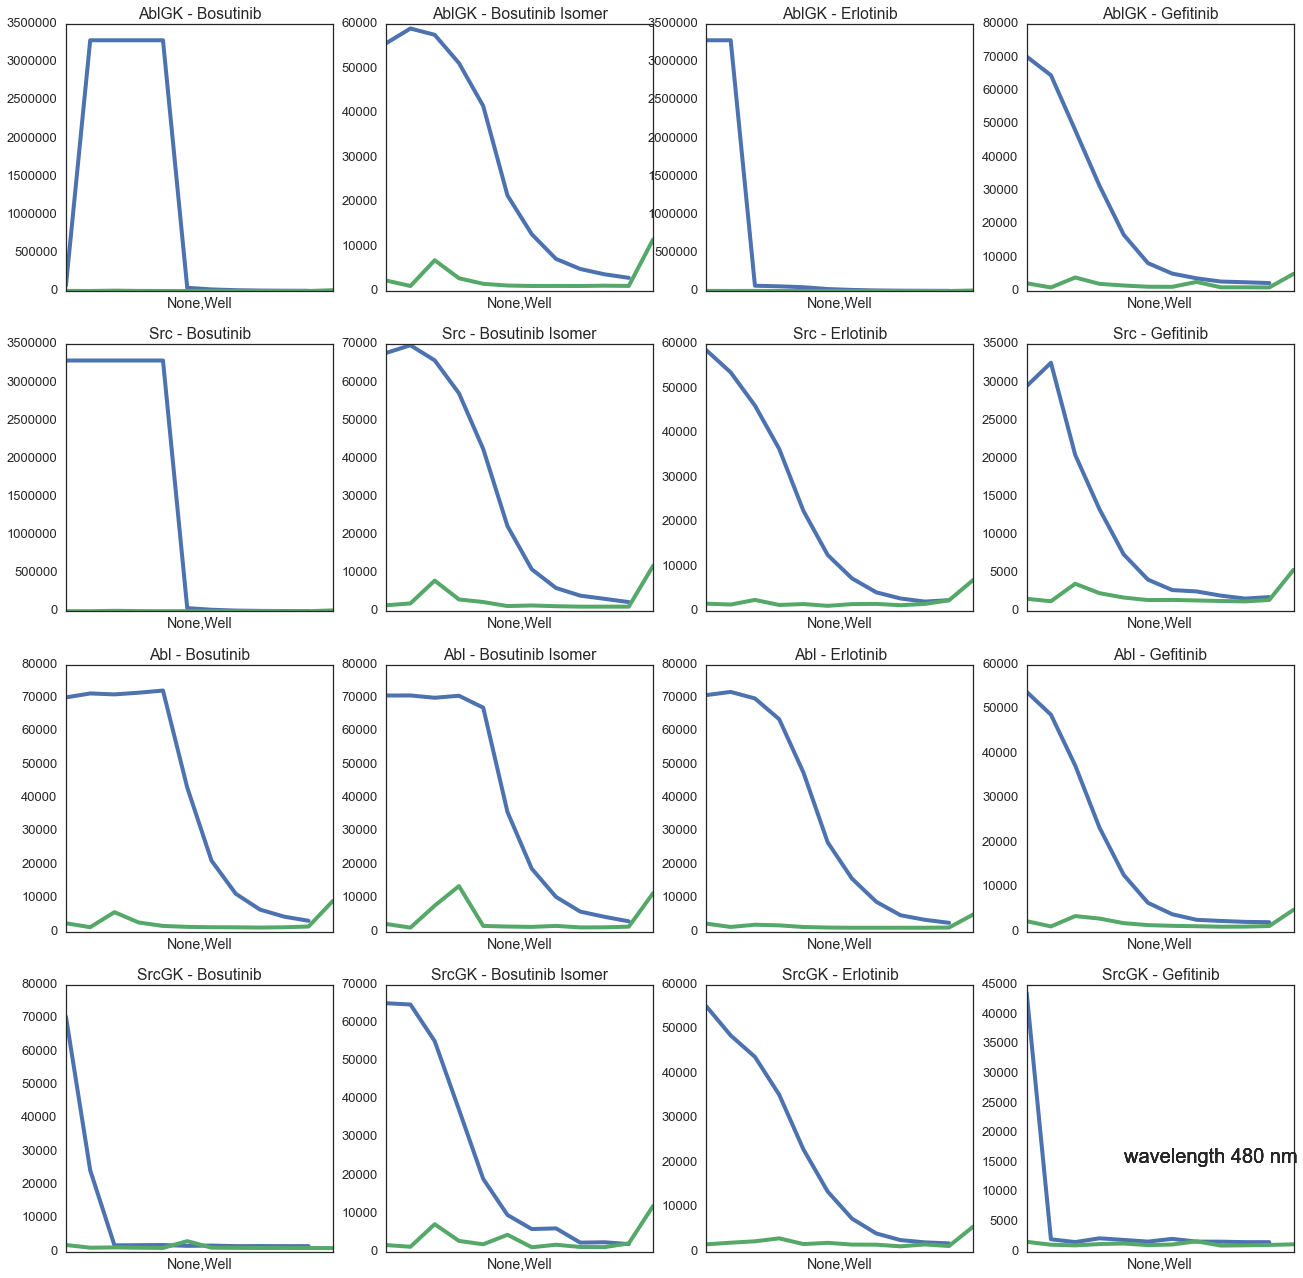

In [19]:
#This works for a full set of proteins
plot_spectra2singlet(file_set,ligands,480)